La función de transferencia. Álgebra de funciones de transferencia
==================================================================

Para un proceso sencillo, como el del nivel del depósito, se puede
plantear un esquema sencillo que describa en cierta medida al sistema:

In [25]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp
from myst_nb import glue

d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().right().label('Entrada\n\n$f(t)$', 'left')
d += (proceso := dsp.Box(w=2, h=1.5).label('Proceso').anchor('W'))
d += dsp.Arrow().right().label('Salida\n\n$y(t)$', 'right').at(proceso.E)

# d.draw()

glue("proc_fig", d, display=False)

```{glue:figure} proc_fig
---
align: center
name: proc-fig
figclass: margin-caption
---
Representación simplificada de un proceso.
```

Para el ejemplo del nivel del depósito, $f (t) = Q_1 (t)$ y
$y (t) = H (t)$. Es decir, en este caso el depósito es el proceso, la
salida es la variación del nivel del depósito y la entrada al proceso es
el caudal de entrada.

En el caso de trabajar utilizando las transformadas de Laplace de las
funciones de entrada y salida, se puede representar la dinámica del
proceso mediante el uso de la *función de transferencia*. La función de
transferencia $G (s)$ liga la entrada y la salida del sistema:

$$G (s) = \frac{\mathcal{L} [y (t)]}{\mathcal{L} [f (t)]} = \frac{\bar{y}
   (s)}{\bar{f} (t)}$$

donde $\bar{y} (s)$ es la transformada de Laplace de la respuesta del
proceso definida utilizando variables de desviación y $\bar{f} (s)$ es
la transformada de la función de desviación de la entrada.

In [26]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().right().label('Entrada\n\n' + r'$\bar{f}(s)$', 'left')
d += (proceso := dsp.Box(w=2, h=1.5).label('$G(s)$').anchor('W'))
d += dsp.Arrow().right().label('Salida\n\n' + r'$\bar{y}(s)$', 'right').at(proceso.E)

# d.draw()

glue("transf_fig", d, display=False)

```{glue:figure} transf_fig
---
align: center
name: transf-fig
figclass: margin-caption
---
La función de transferencia del proceso es $G(s)$, $\bar{f}(s)$ y $\bar{y}(s)$ son la transformada de Laplace de las funciones de entrada y salida del proceso.
```

Para obtener la función de transferencia del ejemplo se realiza la
transformada de Laplace de la ecuación diferencial {eq}`ODE`:

$$\mathcal{L} \left[ A \frac{d H (t)}{d t} \right] =\mathcal{L} \left[ Q_1
   (t) - \frac{H (t)}{R} \right]$$

Se realizan las transformadas considerando que el operador es lineal y
conociendo la transformada de una derivada:

$$A s \bar{H} (s) = \overline{Q_1} (s) - \frac{\bar{H} (s)}{R}$$

Se supone que para $t = 0$ el sistema está todavía en estado
estacionario, las variables de desviación son nulas.

Operando la ecuación anterior para encontrar la función de
transferencia:

$$G (s) = \frac{\bar{H} (s)}{\overline{Q_1} (s)} = \frac{R}{R A s + 1}$$

Este es la función de transferencia típica de un sistema de primer
orden.

Para los procesos más complicados, con diagramas de bloques más
complejos, se recurre al álgebra de funciones de transferencia.

En la situación en la que se presente un conjunto de procesos en paralelo, que se representan como una serie de bloques en paralelo, como los de la figura siguiente:

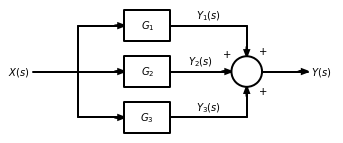

In [63]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Line().label('$X(s)$', 'left').right().length(1.5)
d += (punto := dsp.Dot(radius=0))
d += dsp.Arrow().right().length(1.5)
d += (g2 := dsp.Box(w=1.5, h=1).label('$G_2$').anchor('W'))
d += dsp.Line().up().at(punto.center).length(1.5)
d += dsp.Arrow().right().length(1.5)
d += (g1 := dsp.Box(w=1.5, h=1).label('$G_1$').anchor('W'))
d += dsp.Line().down().at(punto.center).length(1.5)
d += dsp.Arrow().right().length(1.5)
d += (g3 := dsp.Box(w=1.5, h=1).label('$G_3$').anchor('W'))
d += dsp.Line().right().label('$Y_2(s)$', 'top').at(g2.E).length(2)
d += dsp.Arrowhead().label('+', 'top')
d += (suma := dsp.Circle().anchor('W'))
d += dsp.Line().right().label('$Y_1(s)$', 'top').at(g1.E).tox(suma.N)
d += dsp.Line().down().toy(suma.N)
d += dsp.Arrowhead().label('+', 'bot')
d += dsp.Line().right().label('$Y_3(s)$', 'top').at(g3.E).tox(suma.S)
d += dsp.Line().up().toy(suma.S)
d += dsp.Arrowhead().label('+', 'bot')
d += dsp.Arrow().label('$Y(s)$', 'right').right().length(1.5).at(suma.E)

d.draw()

Se puede encontrar un bloque equivalente que reuna las tres funciones de transferencia $G_1$, $G_2$ y $G_3$ en una sola función de transferencia $G$:

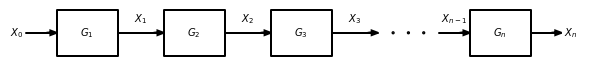

In [20]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw.elements import DotDotDot
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().right().label('$X_0$', 'left')
d += (p1 := dsp.Box(w=2, h=1.5).label('$G_1$').anchor('W'))
d += dsp.Arrow().right().label('$X_1$', 'top').at(p1.E).length(1.5)
d += (p2 := dsp.Box(w=2, h=1.5).label('$G_2$').anchor('W'))
d += dsp.Arrow().right().label('$X_2$', 'top').at(p2.E).length(1.5)
d += (p3 := dsp.Box(w=2, h=1.5).label('$G_3$').anchor('W'))
d += dsp.Arrow().right().label('$X_3$', 'top').at(p3.E).length(1.5)
d += DotDotDot(radius=0.02)
d += dsp.Arrow().right().label('$X_{n-1}$', 'top')
d += (pn := dsp.Box(w=2, h=1.5).label('$G_n$').anchor('W'))
d += dsp.Arrow().right().label('$X_n$', 'right').at(pn.E)

d.draw()

Buscar un bloque equivalente tiene la ventaja de que solo será necesario trabajar con una función de transferencia en lugar de con tres, si se necesita conocer las funciones $X_1$, $X_2$ y $X_3$.

En este caso obtener la función de
transferencia equivalente es una tarea sencilla:

$$G (s) = \frac{Y (s)}{X (s)} = \frac{Y_1 (s) + Y_2 (s) + Y_3 (s)}{X (s)} =
   G_1 (s) + G_2 (s) + G_3 (s)$$

Generalizando: 

$$G (s) = \sum_i G_i (s)$$ 

Para un diagrama de bloques en serie:

$$G (s) = \frac{X_n}{X_0} = \frac{X_1}{X_0}  \frac{X_2}{X_1} \cdots
   \frac{X_n}{X_{n - 1}} = G_1 G_2 \ldots G_n$$

Generalizando:

$$\label{ec:serie} G (s) = \prod_i G_i (s)$$

:::{admonition} Ejemplo El problema 3.6 muestra un ejemplo de sistema
en serie. Se trata de dos depósitos de almacenamiento en serie. La
curiosidad es que se plantea el sistema con interacción (el mostrado en
la figura
<a href="#fig:serie" data-reference-type="ref" data-reference="fig:serie">[fig:serie]</a>)
y el sistema de tanques sin interacción, para el que no es aplicable de
manera directa la ecuación
<a href="#ec:serie" data-reference-type="ref" data-reference="ec:serie">[ec:serie]</a>.
:::